In [101]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data Exploration

In [1]:
!ls

data  data_exploration.ipynb  LICENSE  README.md


In [7]:
!ls data/

GCP%20Credits%20Request%20Link%20-%20RSNA.txt  stage_1_train_images.zip
stage_1_detailed_class_info.csv		       stage_1_train_labels.csv
stage_1_detailed_class_info.csv.zip	       stage_1_train_labels.csv.zip
stage_1_sample_submission.csv		       test
stage_1_test_images.zip			       train


In [100]:
import pandas as pd
import glob
import pydicom
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = "/home/jeff/notebooks/kaggle/pneumonia/"

In [7]:
df_labels = pd.read_csv('data/stage_1_train_labels.csv')

In [10]:
df_labels.head(n=10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [23]:
df_labels['Target'].unique()

array([0, 1])

In [12]:
! ls data/train/ | grep 0004cfab-14fd-4e49-80ba-63a80b6bddd6

0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm


In [14]:
df_submit_sample = pd.read_csv('data/stage_1_sample_submission.csv')

In [16]:
df_submit_sample.head(n=10)

,patientId,PredictionString
0,000924cf-0f8d-42bd-9158-1af53881a557,0.5 0 0 100 100
1,000db696-cf54-4385-b10b-6b16fbb3f985,0.5 0 0 100 100
2,000fe35a-2649-43d4-b027-e67796d412e0,0.5 0 0 100 100
3,001031d9-f904-4a23-b3e5-2c088acd19c6,0.5 0 0 100 100
4,0010f549-b242-4e94-87a8-57d79de215fc,0.5 0 0 100 100
5,001916b8-3d30-4935-a5d1-8eaddb1646cd,0.5 0 0 100 100
6,0022073f-cec8-42ec-ab5f-bc2314649235,0.5 0 0 100 100
7,0022995a-45eb-4cfa-9a59-cd15f5196c64,0.5 0 0 100 100
8,0025d2de-bd78-4d36-9f72-e15a5e22ca82,0.5 0 0 100 100
9,00293de0-a530-41dc-9621-0b3def01d06d,0.5 0 0 100 100


PredictionString = confidence, x-min, y-min, width, height

In [17]:
df_detailed_class = pd.read_csv("data/stage_1_detailed_class_info.csv")

In [18]:
df_detailed_class.head(n=10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [21]:
df_detailed_class['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity'],
      dtype=object)

Are there any test images are in this file "data/stage_1_detailed_class_info.csv"?

In [25]:
test_files = glob.glob('data/test/*.dcm')

In [28]:
len(test_files), test_files[0]

(1000, 'data/test/c0654897-6bfe-4b7c-abd3-dda76d0fcac2.dcm')

In [33]:
ids = [line.split('/')[-1][:-4] for line in test_files]

In [41]:
for i in range(df_detailed_class.shape[0]):
    if df_detailed_class['patientId'][i] in ids: print('yay'); break

No test images are in this file "data/stage_1_detailed_class_info.csv" not sure how it is useful

In [25]:
test_files = glob.glob('data/test/*.dcm')

In [49]:
train_files = glob.glob('data/train/*.dcm')

In [43]:
ds = pydicom.dcmread(test_files[0])

In [44]:
ds.__dict__

{'_parent_encoding': 'iso8859',
 'file_meta': (0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.4958.1517874310.578258
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360',
 'filename': 'data/test/c0654897-6bfe-4b7c-abd3-dda76d0fcac2.dcm',
 'fileobj_type': <function io.open>,
 'is_decompressed': False,
 'is_implicit_VR': False,
 'is_little_endian': True,
 'preamble': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [47]:
ds.pixel_array

array([[  0,   0,   1, ...,  73,  81,  39],
       [  1,   1,   1, ..., 149, 151,  96],
       [  1,   1,   2, ..., 140, 140,  77],
       ...,
       [105, 177, 166, ...,   4,   3,   3],
       [ 49,  85,  83, ...,   3,   2,   1],
       [  0,   0,   1, ...,   0,   0,   0]], dtype=uint8)

In [46]:
ds.pixel_array.shape

(1024, 1024)

In [50]:
len(test_files), len(train_files)

(1000, 25684)

#### Things we want to know
- Min and max values of pixels
- Distribution of image sizes
- How many images of each class (0 and 1)



In [51]:
train_files[:5]

['data/train/0949d712-9d3c-424a-99b5-423a598d8b97.dcm',
 'data/train/c62c2faf-5d84-444c-b9e9-12abe38d3dac.dcm',
 'data/train/db38a091-c7af-4ef4-a94a-cf2a87e11ea4.dcm',
 'data/train/4e73b1f7-9b5f-44b7-9a6d-45d7256b8b94.dcm',
 'data/train/3fd6fcca-e35b-432b-8e7f-be83b110694c.dcm']

In [53]:
for file in train_files:
    ds = pydicom.dcmread(file)
    if ds.pixel_array.shape[0] != 1024 or ds.pixel_array.shape[1] != 1024:
        print("Problem!") 

KeyboardInterrupt: 

In [57]:
np.max(ds.pixel_array), np.min(ds.pixel_array)

(255, 0)

- Pixel values range from 0 to 255
- images are single channel
- all sized 1024, 1024

In [59]:
np.max(df_labels['width']), np.min(df_labels['width'])

(528.0, 40.0)

In [60]:
np.max(df_labels['height']), np.min(df_labels['height'])

(942.0, 45.0)

number of images of class 0 (no pneumonia)

In [69]:
np.where(df_labels['Target']==0)[0].shape[0]

20025

number of images of class 1 (pneumonia)

In [70]:
np.where(df_labels['Target']==1)[0].shape[0]

8964

In [74]:
20025+8964 == df_labels.shape[0]

True

In [93]:
np.where(df_labels['x'].isnull())[0].shape[0]

20025

In [94]:
np.where(df_labels['y'].isnull())[0].shape[0]

20025

In [97]:
np.where(df_labels['width'].isnull())[0].shape[0]

20025

In [96]:
np.where(df_labels['height'].isnull())[0].shape[0]

20025

Plot an image

In [102]:
ds.pixel_array

array([[  8,  16,  15, ...,  14,   9,   0],
       [ 16,  24,  23, ...,  18,  13,   2],
       [ 14,  22,  21, ...,  19,  13,   3],
       ...,
       [ 56, 109, 121, ...,  17,  11,   0],
       [ 72, 114, 119, ...,  15,  11,   4],
       [  1,  18,   6, ...,   2,   2,   0]], dtype=uint8)

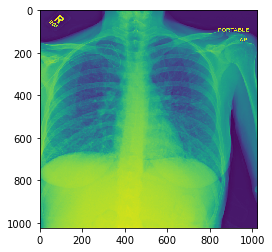

In [103]:
plt.imshow(ds.pixel_array)